Import Required Library:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Datasets:

In [2]:
file_path="../data/raw_analyst_ratings.csv"
df=pd.read_csv(file_path)
df

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


<Axes: xlabel='date'>

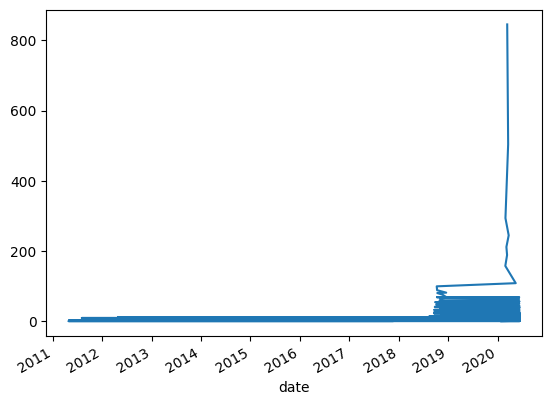

In [6]:
# Publication frequency over time
df['date'].value_counts().plot(kind='line')

Invalid date entries found:
 10        NaT
11        NaT
12        NaT
13        NaT
14        NaT
           ..
1407323   NaT
1407324   NaT
1407325   NaT
1407326   NaT
1407327   NaT
Name: date, Length: 1351341, dtype: datetime64[ns, UTC-04:00]


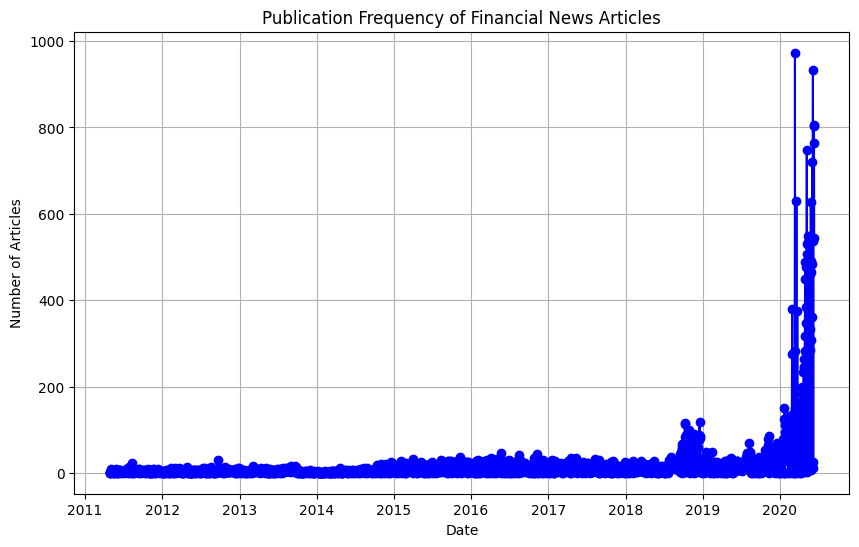

In [7]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check and clean any invalid date entries
invalid_dates = df['date'][df['date'].isna()]
if not invalid_dates.empty:
    print("Invalid date entries found:\n", invalid_dates)
# Group articles by date and count the number of publications
daily_publications = df.groupby(df['date'].dt.date)['headline'].count()
# Plot the publication frequency over time
plt.figure(figsize=(10, 6))
daily_publications.plot(kind='line', marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency of Financial News Articles')
plt.grid(True)
plt.show()


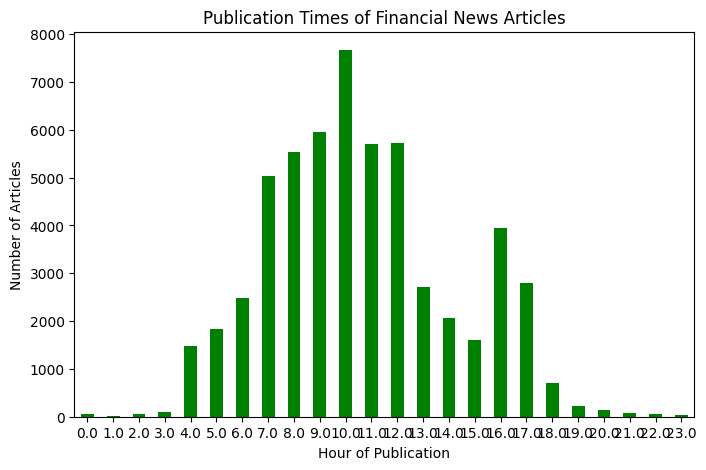

In [8]:
# Extract the hour of publication
df['hour_of_publication'] = df['date'].dt.hour

# Group articles by hour and count the number of publications
hourly_publications = df.groupby('hour_of_publication')['headline'].count()

# Plot the results
plt.figure(figsize=(8, 5))
hourly_publications.plot(kind='bar', color='g')
plt.xlabel('Hour of Publication')
plt.ylabel('Number of Articles')
plt.title('Publication Times of Financial News Articles')
plt.xticks(rotation=0)
plt.show()


In [9]:
## Analysis of publishing times
df['hour'] = df['date'].dt.hour
hour_counts = df['hour'].value_counts()
print(hour_counts)

hour
10.0    7669
9.0     5965
12.0    5732
11.0    5701
8.0     5527
7.0     5033
16.0    3939
17.0    2800
13.0    2710
6.0     2476
14.0    2075
5.0     1829
15.0    1612
4.0     1469
18.0     704
19.0     227
20.0     131
3.0       93
21.0      82
0.0       67
2.0       57
22.0      48
23.0      27
1.0       14
Name: count, dtype: int64
